## **Input Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv ("/content/sample_data/WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


## **Meninjau Apakah Dataset Sudah Bersih dan Bebas Dari Null**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.isnull().sum()

nonull = 0
null = 0

for i in df.isnull().sum():
  if i > 0:
    print(i)
    print(f"Ada data yang kosong yaitu {i}")
    nonull += 1
  else:
    null += 1

if nonull == 0:
  print("Tidak ada data yang kosong")
else:
  print(f"Tidak ada data yang kosong yaitu {i}")

Tidak ada data yang kosong


## **Mengetahui Seberapa Kuat Hubungan Korelasi Data dengan Heatmap**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Menghapus kolom 'ID Wine'
df.drop(columns=['Id'], inplace=True)

# Menampilkan DataFrame untuk memastikan kolom terhapus
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


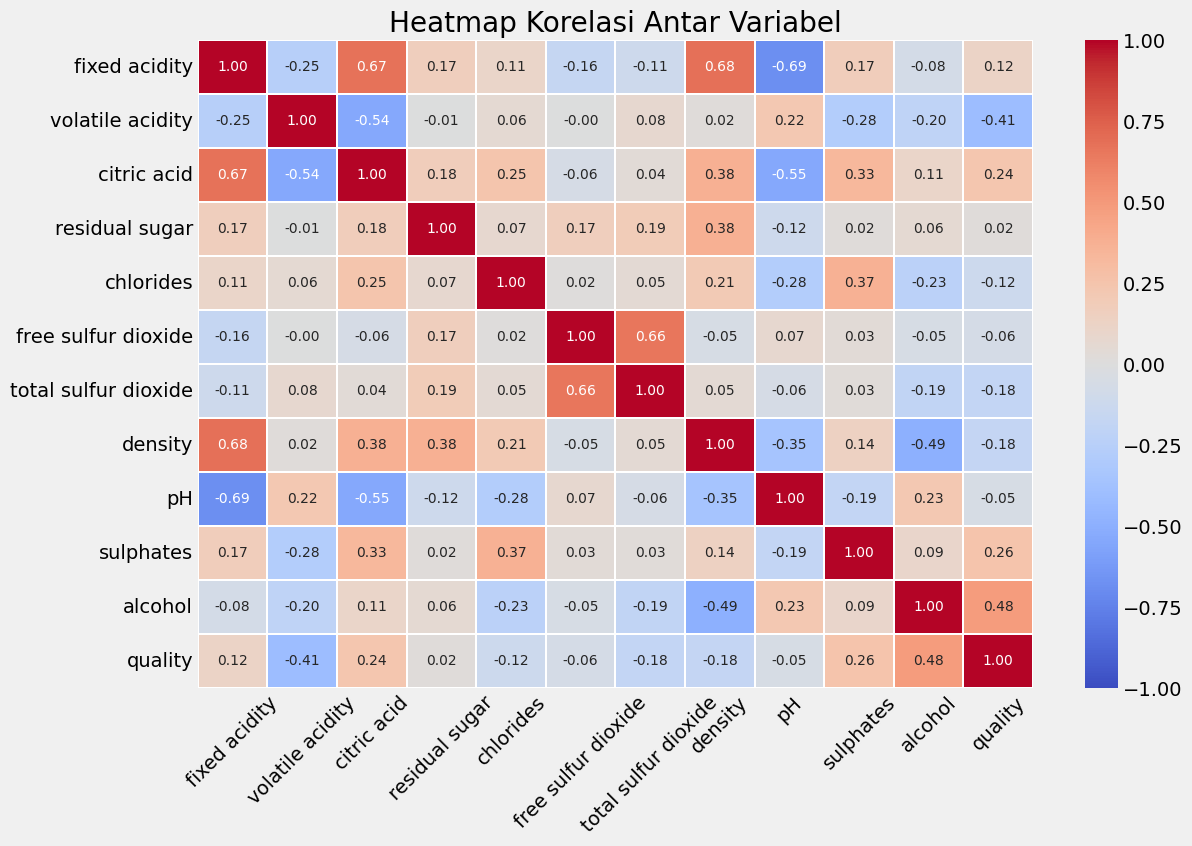

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,vmax=1,
    xticklabels=df.columns,
    yticklabels=df.columns,
    linewidths=0.1,
    annot_kws={"size": 10}
    )
plt.xticks(rotation=45)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

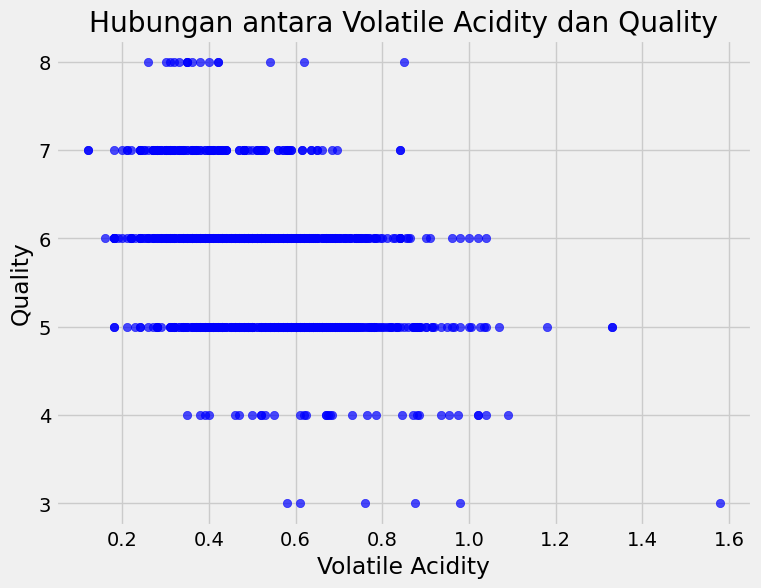

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['volatile acidity'], df['quality'], alpha=0.7, color='blue')
plt.title('Hubungan antara Volatile Acidity dan Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

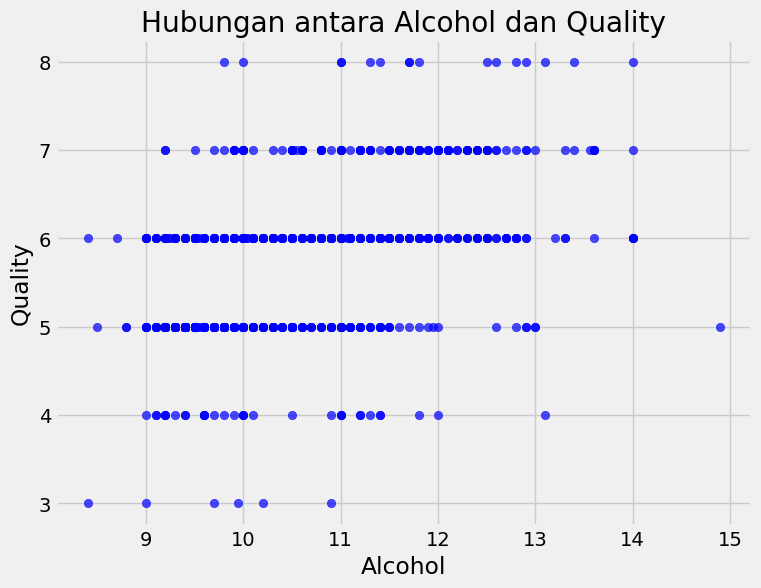

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['alcohol'], df['quality'], alpha=0.7, color='blue')
plt.title('Hubungan antara Alcohol dan Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

## **Mengefisiensi Nama Variabel menjadi Variabel X untuk Variabel Independen dan Variabel Y untuk Variabel Dependen**

In [ ]:
# Mengganti nama variabel menjadi x1, x2, dan y
df.rename(columns={'fixed acidity': 'x1', 'volatile acidity': 'x2', 'citric acid': 'x3', 'residual sugar' : 'x4',
                   'chlorides' : 'x5', 'free sulfur dioxide' : 'x6', 'total sulfur dioxide' : 'x7', 'density' : 'x8',
                   'pH' : 'x9', 'sulphates' : 'x10', 'alcohol' : 'x11', 'quality' : 'y'}, inplace=True)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


## **Membentuk Model Regresi**

In [ ]:
import numpy as np
import statsmodels.api as sm
x = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']]
y = df['y']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     61.49
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          4.26e-107
Time:                        12:45:06   Log-Likelihood:                -1106.7
No. Observations:                1143   AIC:                             2237.
Df Residuals:                    1131   BIC:                             2298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5495     24.773      0.870      0.3

Model Regresi :

*   y_topi = β0 + β1 (x1) + β2 (x2) + β3 (x3) + β4 (x4) + β5 (x5) + β6 (x6) + β7 (x7) + β8 (x8) + β9 (x9) + β10 (x10) + β11 (x11)

*   y_topi = 21.5495 + 0.023 (x1) - 1.1291 (x2) - 0.1319 (x3) + 0.0135 (x4) - 1.7082 (x5) + 0.0024 (x6) - 0.0028 (x7) - 17.4493 (x8) - 0.4082 (x9) + 0.8752 (x10) + 0.2801 (x11)

## **Menghasilkan Nilai Prediksi dan Nilai Residualnya**

In [ ]:
prediksi = model.predict(x)
print(prediksi.head())

0    5.036097
1    5.116269
2    5.210954
3    5.736239
4    5.036097
dtype: float64


In [ ]:
residual = model.resid
print (residual.head())

0   -0.036097
1   -0.116269
2   -0.210954
3    0.263761
4   -0.036097
dtype: float64


## **Melakukan Uji F**

1. Menentukan Hipoteesis Null dengan Hipotesis Alternatif
*   H0 : β1 = β2 = 0
*   H1 : minimal ada satu βj ≠ 0, dimana j = 1, 2
2. Menentukan Level of significance atau α sebesar 5% atau 0.05
3. Menentukan Uji Statistik F

In [ ]:
# Mendefinisikan Hipotesis
h0 = 'B1 = B2 = 0, tidak terdapat pengaruh signifikan secara serentak variabel independent berpengaruh terhadap variabel dependen'
h1 = 'minimal ada 1 bj ≠ 0, terdapat pengaruh signifikan secara serentak variabel independent berpengaruh terhadap variabel dependen'

# Menentukan alfa
alfa = 0.05

# Mencari F tabel
from scipy.stats import f
k = x.shape[1] - 1  # tidak termasuk intercept
n = len(y)

# Derajat kebebasan untuk pembilang dan penyebut
df1 = k
df2 = n - k - 1

fhitung = model.fvalue
ftabel = f.ppf(1-alfa, df1, df2)
print('Nilai F tabel:', ftabel)
print('Nilai F hitung :', fhitung)

# Kesimpulan
if fhitung > ftabel:
    print(f"Karena f hitung > f tabel maka {h1} (Tolak H0)")
else:
    print(f"Karena f hitung < f tabel maka {h1} (Gagal tolak H0)")

Nilai F tabel: 1.7971020026562217
Nilai F hitung : 61.49170557856101
Karena f hitung > f tabel maka minimal ada 1 bj ≠ 0, terdapat pengaruh signifikan secara serentak variabel independent berpengaruh terhadap variabel dependen (Tolak H0)


4. Menentukan Titik Kritis Pengujian
*   Dengan α sebesar 0.05, H0 ditolak jika Fhit > Ftabel

5. Menentukan Kesimpulan Hasil Pengujian dan Interpretasi
*   Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai F-hitung sebesar 61.49 (menurut perhitungan manual / OLS) dan nilai F-tabel sebesar 1.79, F-hitung = 61.49 > F-tabel = 1.79, sehingga H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya





## **Melakukan Uji Z**

1. Menentukan Hipotesis Null dengan Hipotesis Alternatif
*   H0 : β1 = 0
*   H1 : β1 ≠ 0,
2. Menentukan Level of significance atau α sebesar 5% atau 0.05
3. Menentukan Uji Statistik Z

In [ ]:
from scipy.stats import norm

# Mendefinisikan Hipotesis
h00 = 'tidak terdapat pengaruh signifikan secara individu variabel independen terhadap variabel dependen'
h11 = 'terdapat pengaruh signifikan secara individu variabel independen terhadap variabel dependen'

# Menentukan alfa
alfa = 0.05

# Variabel untuk menghitung jumlah yang signifikan dan tidak
jumlah_signifikan = 0
jumlah_tidak_signifikan = 0

# Uji z dan kesimpulan untuk setiap variabel
for var_name, z_hitung in zip(model.params.index, model.tvalues):  # Menggunakan tvalues sebagai pengganti z-hitung
    z_tabel = norm.ppf(1 - alfa / 2)  # Nilai z-tabel untuk uji dua arah

    print(f"\nUji z untuk {var_name}:")
    print(f"z-hitung: {z_hitung:.4f}")
    print(f"z-tabel: {z_tabel:.4f}")

    # Kesimpulan berdasarkan uji z
    if abs(z_hitung) > z_tabel:  # Menggunakan abs(z_hitung) karena uji dua sisi
        print(f"Kesimpulan: {h11}")
        jumlah_signifikan += 1
    else:
        print(f"Kesimpulan: {h00}")
        jumlah_tidak_signifikan += 1

# Menampilkan jumlah variabel yang signifikan dan tidak signifikan
print(f"\nJumlah variabel signifikan: {jumlah_signifikan}")
print(f"Jumlah variabel tidak signifikan: {jumlah_tidak_signifikan}")



Uji z untuk const:
z-hitung: 0.8699
z-tabel: 1.9600
Kesimpulan: tidak terdapat pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Uji z untuk x1:
z-hitung: 0.7594
z-tabel: 1.9600
Kesimpulan: tidak terdapat pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Uji z untuk x2:
z-hitung: -8.0234
z-tabel: 1.9600
Kesimpulan: terdapat pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Uji z untuk x3:
z-hitung: -0.7622
z-tabel: 1.9600
Kesimpulan: tidak terdapat pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Uji z untuk x4:
z-hitung: 0.7321
z-tabel: 1.9600
Kesimpulan: tidak terdapat pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Uji z untuk x5:
z-hitung: -3.4343
z-tabel: 1.9600
Kesimpulan: terdapat pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Uji z untuk x6:
z-hitung: 0.9281
z-tabel: 1.9

4. Menentukan Titik Kritis Pengujian
*   Dengan α sebesar 0.05, H0 ditolak jika Zhit > Ztabel

5. Menentukan Kesimpulan Hasil Pengujian dan Interpretasi
*   Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai |Z-hitung_1| untuk variabel Fixed Acidity adalah 0.759 (Menurut perhitungan manual / OLS), P-Value yang didapat sebesar 0.448, dan nilai Z-tabel sebesar 1.96. Nilai |Z-hitung_1| = 0.759 < Z-tabel = 1.96 sehingga dapat disimpulkan H0 gagal ditolak yang artinya bahwa variabel Fixed Accidity tidak berpengaruh signifikan pada Kualitas Wine
*   Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai |Z-hitung_2| untuk variabel Volatile Acidity adalah -8.023 (Menurut perhitungan manual / OLS), P-Value yang didapat sebesar 0.000, dan nilai Z-tabel sebesar 1.96. Nilai |Z-hitung_2| = -8.023 < Z-tabel = 1.96 sehingga dapat disimpulkan H0 gagal ditolak yang artinya bahwa variabel Volatile Accidity tidak berpengaruh signifikan pada Kualitas Wine
*    Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai |Z-hitung_3| untuk variabel Citric Acid adalah -0.762 (Menurut perhitungan manual / OLS), P-Value yang didapat sebesar 0.446, dan nilai Z-tabel sebesar 1.96. Nilai |Z-hitung_3| = -0.762 < Z-tabel = 1.96 sehingga dapat disimpulkan H0 gagal ditolak yang artinya bahwa variabel Citric Acid tidak berpengaruh signifikan pada Kualitas Wine
*    Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai |Z-hitung_4| untuk variabel Residual Sugar adalah 0.732 (Menurut perhitungan manual / OLS), P-Value yang didapat sebesar 0.464, dan nilai Z-tabel sebesar 1.96. Nilai |Z-hitung_4| = 0.732 < Z-tabel = 1.96 sehingga dapat disimpulkan H0 gagal ditolak yang artinya bahwa variabel Residual Sugar tidak berpengaruh signifikan pada Kualitas Wine
*    Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai |Z-hitung_5| untuk variabel Chlorides adalah -3.434 (Menurut perhitungan manual / OLS), P-Value yang didapat sebesar 0.001, dan nilai Z-tabel sebesar 1.96. Nilai |Z-hitung_5| = -3.434 < Z-tabel = 1.96 sehingga dapat disimpulkan H0 gagal ditolak yang artinya bahwa variabel Chlorides tidak berpengaruh signifikan pada Kualitas Wine
*    Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai |Z-hitung_6| untuk variabel Free Sulfur Dioxide adalah 0.928 (Menurut perhitungan manual / OLS), P-Value yang didapat sebesar 0.354, dan nilai Z-tabel sebesar 1.96. Nilai |Z-hitung_6| = 0.928 < Z-tabel = 1.96 sehingga dapat disimpulkan H0 gagal ditolak yang artinya bahwa variabel Free Sulfur Dioxide tidak berpengaruh signifikan pada Kualitas Wine
*    Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai |Z-hitung_7| untuk variabel Total Sulfur Dioxide adalah -3.321 (Menurut perhitungan manual / OLS), P-Value yang didapat sebesar 0.001, dan nilai Z-tabel sebesar 1.96. Nilai |Z-hitung_7| = -3.321 < Z-tabel = 1.96 sehingga dapat disimpulkan H0 gagal ditolak yang artinya bahwa variabel Total Sulfur Dioxide tidak berpengaruh signifikan pada Kualitas Wine
*    Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai |Z-hitung_8| untuk variabel Density adalah -0.69 (Menurut perhitungan manual / OLS), P-Value yang didapat sebesar 0.49, dan nilai Z-tabel sebesar 1.96. Nilai |Z-hitung_8| = -0.69 < Z-tabel = 1.96 sehingga dapat disimpulkan H0 gagal ditolak yang artinya bahwa variabel Density tidak berpengaruh signifikan pada Kualitas Wine
*    Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai |Z-hitung_9| untuk variabel pH adalah -1.832 (Menurut perhitungan manual / OLS), P-Value yang didapat sebesar 0.067, dan nilai Z-tabel sebesar 1.96. Nilai |Z-hitung_9| = -1.832 < Z-tabel = 1.96 sehingga dapat disimpulkan H0 gagal ditolak yang artinya bahwa variabel pH tidak berpengaruh signifikan pada Kualitas Wine
*    Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai |Z-hitung_10| untuk variabel Sulphates adalah 6.555 (Menurut perhitungan manual / OLS), P-Value yang didapat sebesar 0.000, dan nilai Z-tabel sebesar 1.96. Nilai |Z-hitung_10| = 6.555 > Z-tabel = 1.96 sehingga dapat disimpulkan H0 ditolak yang artinya bahwa variabel Sulphates berpengaruh signifikan pada Kualitas Wine
*    Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai |Z-hitung_11| untuk variabel Volatile Alcohol adalah 8.963 (Menurut perhitungan manual / OLS), P-Value yang didapat sebesar 0.000, dan nilai Z-tabel sebesar 1.96. Nilai |Z-hitung_11| = 8.963 < Z-tabel = 1.96 sehingga dapat disimpulkan H0 ditolak yang artinya bahwa variabel Alcohol berpengaruh signifikan pada Kualitas Wine












## **Mendapatkan Nilai R-Squared Adjusted**

In [ ]:
adjusted_r_squared = model.rsquared_adj
print(f"R-Squared Adjusted : {adjusted_r_squared}")
print(f'\nArtinya sekitar {adjusted_r_squared*100}% variabel dependen yaitu dapat dijelaskan/dipengaruhi oleh variabel dependennya yaitu.\nsementara sisanya {(1-adjusted_r_squared)*100}% dipengaruhi oleh variabel yang tidak diketahui')

R-Squared Adjusted : 0.3681562110288449

Artinya sekitar 36.815621102884485% variabel dependen yaitu dapat dijelaskan/dipengaruhi oleh variabel dependennya yaitu.
sementara sisanya 63.184378897115515% dipengaruhi oleh variabel yang tidak diketahui


Berdasarkan perhitungan diatas, didapatkan nilai R-Squared Adjusted sebesar 0.368 (Menurut perhitungan manual / OLS) yang artinya 36.8% Kualitas Wine dipengaruhi oleh dan sisanya 63.2% dipengaruhi oleh variabel lainnya yang tidak diketahui atau tidak diteliti

## **Uji Asumsi Regresi**

### **Uji Normalitas - Memeriksa Asumsi Residual Berdistribusi Normal (Jarque-Bera)**

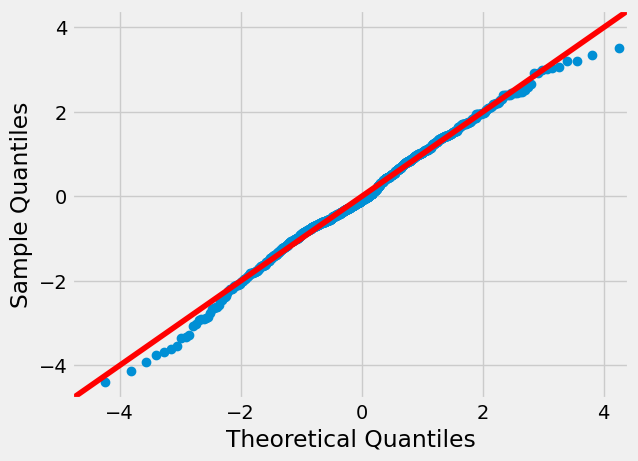

In [ ]:
# Menggambar Plot Q-Q Menggunakan Package Statmodels
import scipy.stats as stats
fig = sm.qqplot(residual, stats.t, fit=True, line='45')
plt.show()

1. Menentukan Hipoteesis Null dengan Hipotesis Alternatif
*   H0 : Populasi berdistribusi normal
*   H1 : Populasi tidak berdistribusi normal
2. Menentukan Level of significance atau α sebesar 5% atau 0.05
3. Menentukan Uji Statistik Jarque-Bera

In [ ]:
# Pengujian Jarque Bera untuk memeriksa asumsi residual
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

nama = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(residual)
hasil = list(zip(nama, test))
print (hasil)

[('Jarque-Bera', 29.204603930823517), ('Chi^2 two-tail prob.', 4.5530333699421883e-07), ('Skew', -0.1407031775079773), ('Kurtosis', 3.7307739003277094)]


In [ ]:
import statsmodels.stats.api as sms
from scipy.stats import chi2

# Menentukan tingkat signifikansi
alpha = 0.05

# Derajat kebebasan untuk uji Jarque-Bera
degree_freedom = 2

# Mencari nilai kritis dari distribusi chi-square
critical_value = chi2.ppf(1 - alpha, degree_freedom)
print("Titik kritis (nilai kritis) dari chi-square:", critical_value)

Titik kritis (nilai kritis) dari chi-square: 5.991464547107979


4. Menentukan Titik Kritis Pengujian
*   Dengan α sebesar 0.05, H0 ditolak jika JB > Titik kritis atau p-value < 0.05

5. Menentukan Kesimpulan Hasil Pengujian dan Interpretasi
*   Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai Jarque Bera = 29.204 (Menurut perhitungan manual / OLS) dan titik kritis sebesar 5.99. Nilai Jarque-Bera = 29.204 > Titik kritis = 5.99 dan P-Value = 0.0000004 < 0.05 sehingga dapat disimpulkan H0 ditolak yang artinya residual tidak memenuhi asumsi berdistribusi normal (Tidak Berdistribusi Normal)

### **Uji Autokorelasi - Memenuhi Asumsi Residual Tidak Terjadi Autokorelasi (Durbin-Watson)**

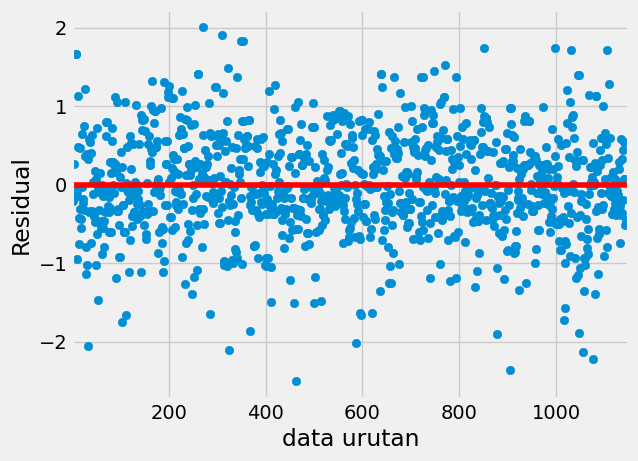

In [ ]:
# Plot Memeriksa Asumsi Residual TTidak Terjadi Autokorelasi
urutan_pengamatan = pd.Series(range(1, len(residual) + 1))
plt.scatter(urutan_pengamatan, residual);
plt.axhline(0, color="red")
plt.xlabel("data urutan");
plt.ylabel("Residual");
plt.xlim([1, 1150]);

1. Menentukan Hipoteesis Null dengan Hipotesis Alternatif
*   H0 : Tidak Terjadi Autokorelasi
*   H1 : Terjadi Autokorelasi
2. Menentukan Level of significance atau α sebesar 5% atau 0.05
3. Menentukan Uji Statistik Durbin-Watson

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic on residuals
dw_statistic = durbin_watson(model.resid)
print("Durbin-Watson Statistic:", dw_statistic)


Durbin-Watson Statistic: 1.7799101820526495


In [ ]:
# Pengujian Durbin Watson
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print (f"Durbin-Watson : {dw}")

if dw == 2 :
  print ("H0 gagal ditolak artinya tidak terjadi autokorelasi")
elif dw < 2 :
  print ("H0 ditolak artinya mengindikasikan bahwa terjadi autokorelasi positif")
else :
  print ("H0 ditolak artinya mengindikasikan bahwa terjadi autokorelasi negatif")

Durbin-Watson : 1.7799101820526495
H0 ditolak artinya mengindikasikan bahwa terjadi autokorelasi positif


4. Menentukan Titik Kritis Pengujian
*   Dengan α sebesar 0.05, H0 ditolak jika 2 < dw < 2, H0 gagal ditolak jika dw = 2

5. Menentukan Kesimpulan Hasil Pengujian dan Interpretasi
*   Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05, n = 1143, dan k = 11, didapatkan bahwa nilai Durbin-Watson = 1.780 (Menurut perhitungan manual / OLS). Nilai Durbin-Watson = 1.749 < 2 yang mana nilai Durbin-Watson mendekati 2 sehingga dapat disimpulkan H0  ditolak yang artinya **mengindikasikan bahwa residual terjadi autokorelasi positif sangat kecil atau tidak signifikan**

### **Uji- Heteroskedastisitas - Memenuhi Asumsi Residual Tidak Terjasi Heteroskedastisitas (Breush-Pagan)**

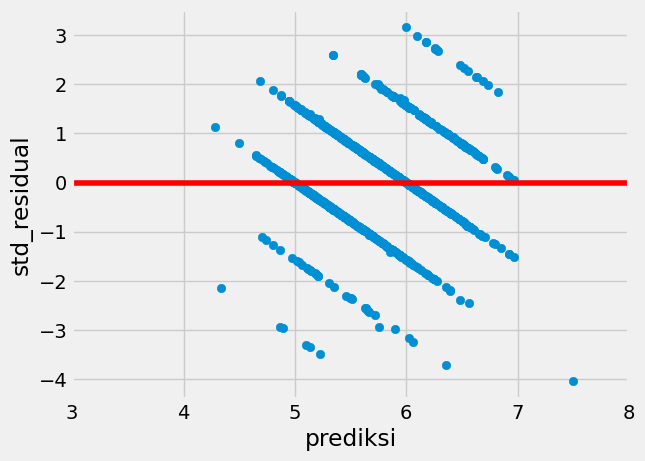

In [ ]:
influence = model.get_influence()
std_residual = influence.resid_studentized_internal
plt.scatter(prediksi, std_residual);
plt.axhline(0, color="red")
plt.xlabel("prediksi");
plt.ylabel("std_residual");
plt.xlim([3, 8]);

1. Menentukan Hipoteesis Null dengan Hipotesis Alternatif
*   H0 : Tidak Terjadi Heteroskedastisitas
*   H1 : Terjadi Heteroskedastisitas
2. Menentukan Level of significance atau α sebesar 5% atau 0.05
3. Menentukan Uji Statistik Breush-Pagan

In [ ]:
# Pengujian Breush-Pagan
import statsmodels.stats.api as sms

nama = ["Lagrange Multiplier Statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
hasil = list(zip(nama, test))
print (hasil)

[('Lagrange Multiplier Statistic', 60.42728443927391), ('p-value', 7.722669581912144e-09), ('f-value', 5.739128124098503), ('f p-value', 4.523229185457708e-09)]


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import chi2

# Model regresi linier
x = sm.add_constant(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']])  # Menambahkan konstanta
model = sm.OLS(df['y'], x).fit()

# Menghitung residu
residuals = model.resid

# Kuadratkan residu
residuals_squared = residuals ** 2

# Regresi kuadrat residu terhadap variabel independen
model_squared = sm.OLS(residuals_squared, x).fit()

# Hitung R^2 dari model kuadrat residu
R_squared = model_squared.rsquared

# Hitung statistik uji Breusch-Pagan
n = len(df)  # Jumlah observasi
BP_statistic = n * R_squared  # Statistik uji BP

# Tentukan derajat bebas
k = 11  # Jumlah variabel independen (TOEFL IBT dan Nilai Ujian)
alpha = 0.05  # Tingkat signifikansi
critical_value = chi2.ppf(1 - alpha, k)  # Titik kritis dari distribusi chi-squared

# Hasil
print(f'Statistik Uji Breusch-Pagan: {BP_statistic:.4f}')
print(f'Titik Kritis: {critical_value:.4f}')

# Keputusan
if BP_statistic > critical_value:
    print("Tolak H0: Ada heteroskedastisitas.")
else:
    print("Tidak ada cukup bukti untuk menolak H0: Tidak ada heteroskedastisitas.")


Statistik Uji Breusch-Pagan: 60.4273
Titik Kritis: 19.6751
Tolak H0: Ada heteroskedastisitas.


4. Menentukan Titik Kritis Pengujian
*   Dengan α sebesar 0.05, H0 ditolak jika BP > Titik kritis atau p-value < 0.05

5. Menentukan Kesimpulan Hasil Pengujian dan Interpretasi
*   Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai Breush-Pagan = 60.4273 dan titik kritis sebesar 19.6751. Nilai Breush-Pagan = 60.4273 > Titik kritis = 19.6751 dan P-Value = 0.000000007 < 0.05 sehingga dapat disimpulkan H0 ditolak yang artinya bahwa asumsi **residual terjadi heteroskedastisitas**

### **Uji Multikolinieritas - Memenuhi Asumsi Tidak Terjadi Multikolinearitas (Variance Inflation Factor (VIF))**

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pastikan hanya kolom numerik yang digunakan
x = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']]
x = x.select_dtypes(include=['number'])

# Menghitung VIF Dataframe
vif = pd.DataFrame()
vif['feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Output format yang lebih rapi
for i in range(len(vif)):
    var_name = vif['feature'][i]
    vif_value = vif['VIF'][i]

    if vif_value >= 10:
        print(f"{var_name} = {vif_value:.2f}, terjadi multikolinearitas.")
    else:
        print(f"{var_name} = {vif_value:.2f}, tidak terjadi multikolinearitas.")


x1 = 74.55, terjadi multikolinearitas.
x2 = 17.04, terjadi multikolinearitas.
x3 = 9.22, tidak terjadi multikolinearitas.
x4 = 5.01, tidak terjadi multikolinearitas.
x5 = 6.72, tidak terjadi multikolinearitas.
x6 = 6.30, tidak terjadi multikolinearitas.
x7 = 6.22, tidak terjadi multikolinearitas.
x8 = 1435.10, terjadi multikolinearitas.
x9 = 1043.34, terjadi multikolinearitas.
x10 = 21.51, terjadi multikolinearitas.
x11 = 123.96, terjadi multikolinearitas.


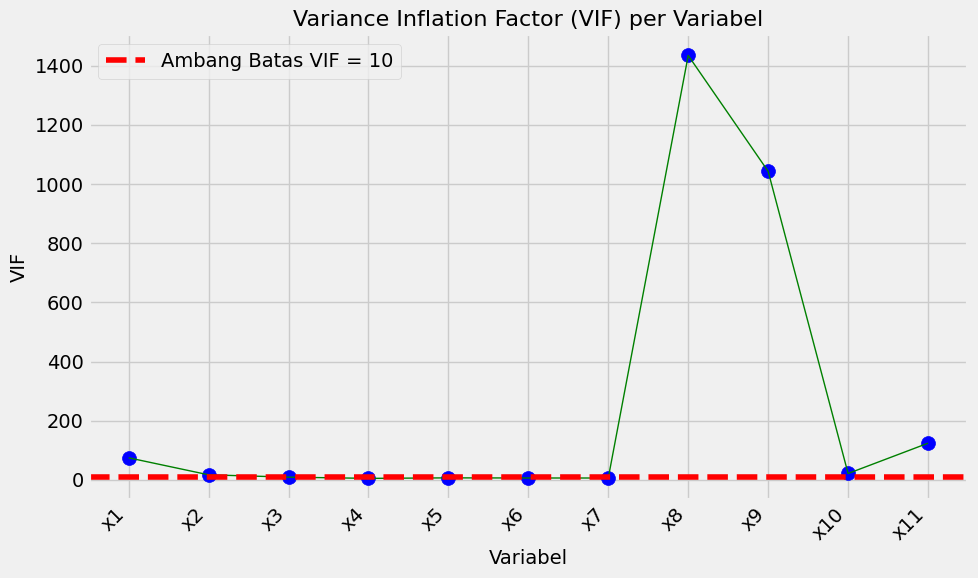

In [ ]:
import matplotlib.pyplot as plt

# Membuat scatter plot untuk VIF dengan garis penghubung
plt.figure(figsize=(10, 6))

# Menampilkan titik scatter
plt.scatter(vif['feature'], vif['VIF'], color='b', s=100)

# Menambahkan garis penghubung antar titik
plt.plot(vif['feature'], vif['VIF'], color='g', linestyle='-', linewidth=1)

# Menambahkan label dan judul
plt.title('Variance Inflation Factor (VIF) per Variabel', fontsize=16)
plt.ylabel('VIF', fontsize=14)
plt.xlabel('Variabel', fontsize=14)

# Menambahkan garis vertikal untuk ambang batas VIF = 10
plt.axhline(y=10, color='r', linestyle='--', label='Ambang Batas VIF = 10')

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.xticks(rotation=45, ha='right')  # Menyusun label x agar lebih rapi
plt.tight_layout()
plt.show()


## **Pemilihan Model Regresi Lanjutan**

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

x = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']]
y = df['y']

# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Tanpa Lasso dan Ridge
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Prediksi
y_pred_linreg = linreg.predict(x_test)

# Evaluasi
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
print("Mean Squared Error (MSE) tanpa Lasso dan Ridge:", mse_linreg)

# Terapkan Regresi Lasso
lasso = Lasso(alpha=0.05)
lasso.fit(x_train, y_train)

# Prediksi menggunakan model Lasso
y_pred_lasso = lasso.predict(x_test)

# Evaluasi Model Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (MSE) dengan Lasso:", mse_lasso)

# Terapkan Regresi Ridge
ridge = Ridge(alpha=0.05)
ridge.fit(x_train, y_train)

# Prediksi menggunakan model Ridge
y_pred_ridge = ridge.predict(x_test)

# Evaluasi Model Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (MSE) dengan Ridge:", mse_ridge)

Mean Squared Error (MSE) tanpa Lasso dan Ridge: 0.3800324502627761
Mean Squared Error (MSE) dengan Lasso: 0.39183739279945506
Mean Squared Error (MSE) dengan Ridge: 0.377956099200413


Berdasarkan penyelesaian yang telah dilakukan, ternyata model Ridge menghasilkan nilai Mean Squared Error (MSE) yang lebih rendah dibandingkan dengan model Regresi Linear namun model Lasso menghasilkan nilai Mean Squared Error (MSE) yang lebih tinggi dibandingkan dengan model Regresi Linear. Hal ini menunjukkan bahwa Metode Ridge lebih efektif dalam menangani Multikolinieritas yang disebabkan oleh variabel prediktor dalam model

## **Model Regresi Ridge**

In [ ]:
# Impor pustaka yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Memilih fitur (variabel independen) dan target (variabel dependen)
x = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']]
y = df['y']

# Membagi data menjadi set pelatihan (training) dan pengujian (testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardisasi fitur
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Menerapkan Ridge Regression
ridge = Ridge(alpha=0.05)
ridge.fit(x_train_scaled, y_train)

# Membuat prediksi pada set pengujian
y_pred = ridge.predict(x_test_scaled)

# Mengevaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Jumlah data (n) dan jumlah fitur (p)
n = len(y_test)
p = x_test.shape[1]

# Menghitung R² Adjusted
r2_adjusted = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Menampilkan hasil
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R²):", r2)
print(f"R² Adjusted: {r2_adjusted:.4f}")
print("Koefisien Ridge:", ridge.coef_)
print("Intercept (b0):", ridge.intercept_)

Mean Squared Error (MSE): 0.3800248542942629
R-Squared (R²): 0.3170830174749698
R² Adjusted: 0.2825
Koefisien Ridge: [ 0.08703788 -0.23909818 -0.06604204  0.00538172 -0.08565189  0.01924267
 -0.07286047 -0.05866528 -0.03807532  0.1615724   0.28633607]
Intercept (b0): 5.6564551422319465


In [ ]:
# Menampilkan persamaan Ridge Regression
print("Persamaan Ridge Regression:")
print(f"Y = {ridge.intercept_:.4f} + ", end="")
for i, coef in enumerate(ridge.coef_):
    print(f"({coef:.4f} * X{i+1})", end=" + " if i < len(ridge.coef_) - 1 else "\n")

Persamaan Ridge Regression:
Y = 5.6565 + (0.0870 * X1) + (-0.2391 * X2) + (-0.0660 * X3) + (0.0054 * X4) + (-0.0857 * X5) + (0.0192 * X6) + (-0.0729 * X7) + (-0.0587 * X8) + (-0.0381 * X9) + (0.1616 * X10) + (0.2863 * X11)
